Following the tutorials on the <a href="https://tslearn.readthedocs.io/en/latest/">tslearn docs</a>

# Basics

In [95]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from tslearn.utils import to_time_series, to_time_series_dataset

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
my_first_time_series = [1, 3, 4, 2]
formatted_time_series = to_time_series(my_first_time_series)

print(formatted_time_series.shape)

(4, 1)


In [97]:
my_second_time_series = [1, 2, 4, 2]
formatted_dataset = to_time_series_dataset([my_first_time_series, my_second_time_series])

print(formatted_dataset.shape)

(2, 4, 1)


In [98]:
my_third_time_series = [1, 2, 4, 2, 2]
formatted_dataset = to_time_series_dataset([my_first_time_series,
                                            my_second_time_series,
                                            my_third_time_series])

# Extend missing entries with nan's
print(formatted_dataset.shape)

(3, 5, 1)


# Working with Standard Time Series Datasets

In [99]:
from tslearn.datasets import UCR_UEA_datasets
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("TwoPatterns")

print(X_train.shape)
print(y_train.shape)

(1000, 128, 1)
(1000,)


In [100]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")
# km.fit(X_train)

# Methods for variable-length time series

In [108]:
from tslearn.utils import to_time_series_dataset
X = to_time_series_dataset([[1, 2, 3, 4], [1, 2, 3], [2, 5, 6, 7, 8, 9]])
y = [0, 0, 1]

## Supervised

### Classification
- K-nearest neighbors vote for Time Series
- Time-series specific Support Vector Classifier

In [17]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
knn = KNeighborsTimeSeriesClassifier(n_neighbors=2)
knn.fit(X, y)

KNeighborsTimeSeriesClassifier(metric='dtw', metric_params=None, n_jobs=None,
                               n_neighbors=2, verbose=0, weights='uniform')

In [18]:
from tslearn.svm import TimeSeriesSVC
clf = TimeSeriesSVC(C=1.0, kernel="gak")
clf.fit(X, y)

TimeSeriesSVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovr', degree=3, gamma='auto',
              kernel='gak', max_iter=-1, n_jobs=None, probability=False,
              random_state=None, shrinking=True, tol=0.001, verbose=0)

### Regression
- Time-series specific Support Vector Regressor

In [19]:
from tslearn.svm import TimeSeriesSVR
clf = TimeSeriesSVR(C=1.0, kernel="gak")
y_reg = [1.3, 5.2, -12.2]
clf.fit(X, y_reg)

TimeSeriesSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
              gamma='auto', kernel='gak', max_iter=-1, n_jobs=None,
              shrinking=True, tol=0.001, verbose=0)

## Unsupervised

### Nearest-Neighbor Search
- K-neighbor search for Time Series

In [84]:
from tslearn.neighbors import KNeighborsTimeSeries
knn = KNeighborsTimeSeries(n_neighbors=2)
knn.fit(X)
# knn.kneighbors()    # Search for neighbors using series from `X` as queries
# knn.kneighbors(X2)  # Search for neighbors using series from `X2` as queries

KNeighborsTimeSeries(metric='dtw', metric_params=None, n_jobs=None,
                     n_neighbors=2, verbose=0)

### Clustering
- Global Alignment Kernel (GAK) K-means
- Time Series K-Means
- <a href="https://en.wikipedia.org/wiki/Silhouette_(clustering)">Silhouette_score</a>

In [28]:
from tslearn.clustering import GlobalAlignmentKernelKMeans
gak_km = GlobalAlignmentKernelKMeans(n_clusters=2)
labels_gak = gak_km.fit_predict(X)

In [29]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=2, metric="dtw")
labels = km.fit_predict(X)
km_bis = TimeSeriesKMeans(n_clusters=2, metric="softdtw")
labels_bis = km_bis.fit_predict(X)

In [30]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
km = TimeSeriesKMeans(n_clusters=2, metric="dtw")
labels = km.fit_predict(X)
silhouette_score(X, labels, metric="dtw")

0.5875727602071013

### Barycenter Computation
- DTW Barycenter Averaging
- Soft-DTW Barycenter

In [31]:
from tslearn.barycenters import dtw_barycenter_averaging
bar = dtw_barycenter_averaging(X, barycenter_size=3)

In [34]:
from tslearn.barycenters import softdtw_barycenter
from tslearn.utils import ts_zeros
initial_barycenter = ts_zeros(sz=5)  # Zero matrix of size 5
bar = softdtw_barycenter(X, init=initial_barycenter)

## Model selection

In [36]:
from sklearn.model_selection import KFold, GridSearchCV
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

knn = KNeighborsTimeSeriesClassifier(metric="dtw")
p_grid = {"n_neighbors": [1, 5]}

cv = KFold(n_splits=2, shuffle=True, random_state=0)
clf = GridSearchCV(estimator=knn, param_grid=p_grid, cv=cv)
clf.fit(X, y)

GridSearchCV(cv=KFold(n_splits=2, random_state=0, shuffle=True),
             error_score=nan,
             estimator=KNeighborsTimeSeriesClassifier(metric='dtw',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, verbose=0,
                                                      weights='uniform'),
             iid='deprecated', n_jobs=None, param_grid={'n_neighbors': [1, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

## Resampling

### Time-Series Resampler

In [37]:
from tslearn.preprocessing import TimeSeriesResampler

resampled_X = TimeSeriesResampler(sz=X.shape[1]).fit_transform(X)
resampled_X.shape

(3, 6, 1)

# Dynamic Time Warping

DTW is a similarity measure between time series. In general, DTW is applied to two time series $x = (x_1, \cdots, x_n)$ and $y = (y_1, \cdots, y_m)$, where each element $x_i$ and $y_j$ are assumed to be in $\mathbb{R}^t$. So, $x \in \mathbb{R}^{n \times t}$ and $y \in \mathbb{R}^{m \times t}$.

For a simple case of $x = (x_1, \cdots, x_n)$, where each $x_i \in \mathbb{R}$, and $y = (y_1, \cdots, y_m)$, where each $y_j \in \mathbb{R}$, for a distance metric $d$, we can construct a $n \times m$ distance matrix $D$ with entries $D_{i, j} = d(x_i, y_j)$. DTW between $x$ and $y$ is formulated as the following optimization problem:

$$
DTW(x,y) = \min_{\pi} \sqrt{\sum_{(i, j) \in \pi} d(x_i, y_j)^2}
$$

where $\pi = [\pi_0, \cdots, \pi_K]$ is a list of indices in the distance matrix $D$ such that the path is a traversal of only downs and rights from the top-left corner $(1,1)$ to the bottom-right corner $(n, m)$.

This is done by the classical dynamic programming problem approach to computing the <a href="https://algorithms.tutorialhorizon.com/dynamic-programming-minimum-cost-path-problem/">minimum cost path in a grid</a> from the corner $(1, 1)$ to the corner $(n, m)$ using only cardinal movements of down and right. The total cost of the path is $DTW(x, y)$, each entry in the path can be seen as a temporal alignment of time series such that Euclidean distance between aligned time series is minimal. The memoized algorithm runs in $O(mn)$ time.

## Properties
- $\forall x, y, DTW(x,y) \geq 0$
- $\forall x, DTW(x,x) = 0$

In [110]:
from tslearn.metrics import dtw, dtw_path

x = to_time_series([1,2,4,2,4,1,5,7,2])
y = to_time_series([2,2,4,3,5,7,7,2])

dtw_score = dtw(x, y)

optimal_path, dtw_score = dtw_path(x, y)
print(optimal_path, dtw_score, sep="\n")

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 3), (6, 4), (7, 5), (7, 6), (8, 7)]
2.6457513110645907


## Additional constraints
Two methods to force paths to lie closer to the diagonal
- Sakoe-Chiba band
    - Parametrized by a radius $r$, also called "warping window size"
    - Bounds the number of off-diagonal elements to consider
- Itakura parallelogram
    - Sets a maximum slope $s$ for alignment paths
- Upper bounding warping path length (discard complex paths)

In [111]:
sc_cost = dtw(x, y, global_constraint="sakoe_chiba", sakoe_chiba_radius=3)
print(f"Sakoe-Chiba: {sc_cost}")

Sakoe-Chiba: 2.6457513110645907


In [112]:
ita_cost = dtw(x, y, global_constraint="itakura", itakura_max_slope=2)
print(f"Itakura: {ita_cost}")

Itakura: 3.3166247903554


In [113]:
from tslearn.metrics import dtw_limited_warping_length
bounded_cost = dtw_limited_warping_length(x, y, len(optimal_path)-1)
print(f"Bounded cost: {bounded_cost}")

Bounded cost: 4.795831523312719


## Barycenters

Computing barycenters (also known as Fréchet means) of a set $\mathcal{D}$ for DTW corresponds to the following optimization problem:
$$
\min_{\mu}\sum_{x \in \mathcal{D}} DTW(\mu, x)^2
$$
Optimizing this quantity can be done through the DTW Barycenter Averaging (DBA) algorithm.

In [114]:
from tslearn.barycenters import dtw_barycenter_averaging
# b = dtw_barycenter_averaging(dataset)

## soft-DTW

DTW is not differentiable w.r.t its inputs because of the non-differentiability of the $\min$ operation. Thus, we replace with a $\mathrm{softmin}$ operator:

$$
\mathrm{softmin}_{\gamma}(a_1, \cdots, a_n) = -\gamma \log \sum_i e^{-a_i/\gamma}
$$

which depends on a hyper-parameter $\gamma$ that controls the smoothing of the resulting metric (DTW corresponds to the limit case $\gamma \rightarrow 0$.

Barycenters for soft-DTW can be estimated through gradient descent.

In [115]:
from tslearn.metrics import soft_dtw
soft_dtw_score = soft_dtw(x, y, gamma=0.1)

print(f"Soft-DTW: {soft_dtw_score}")

Soft-DTW: 6.930678471361954


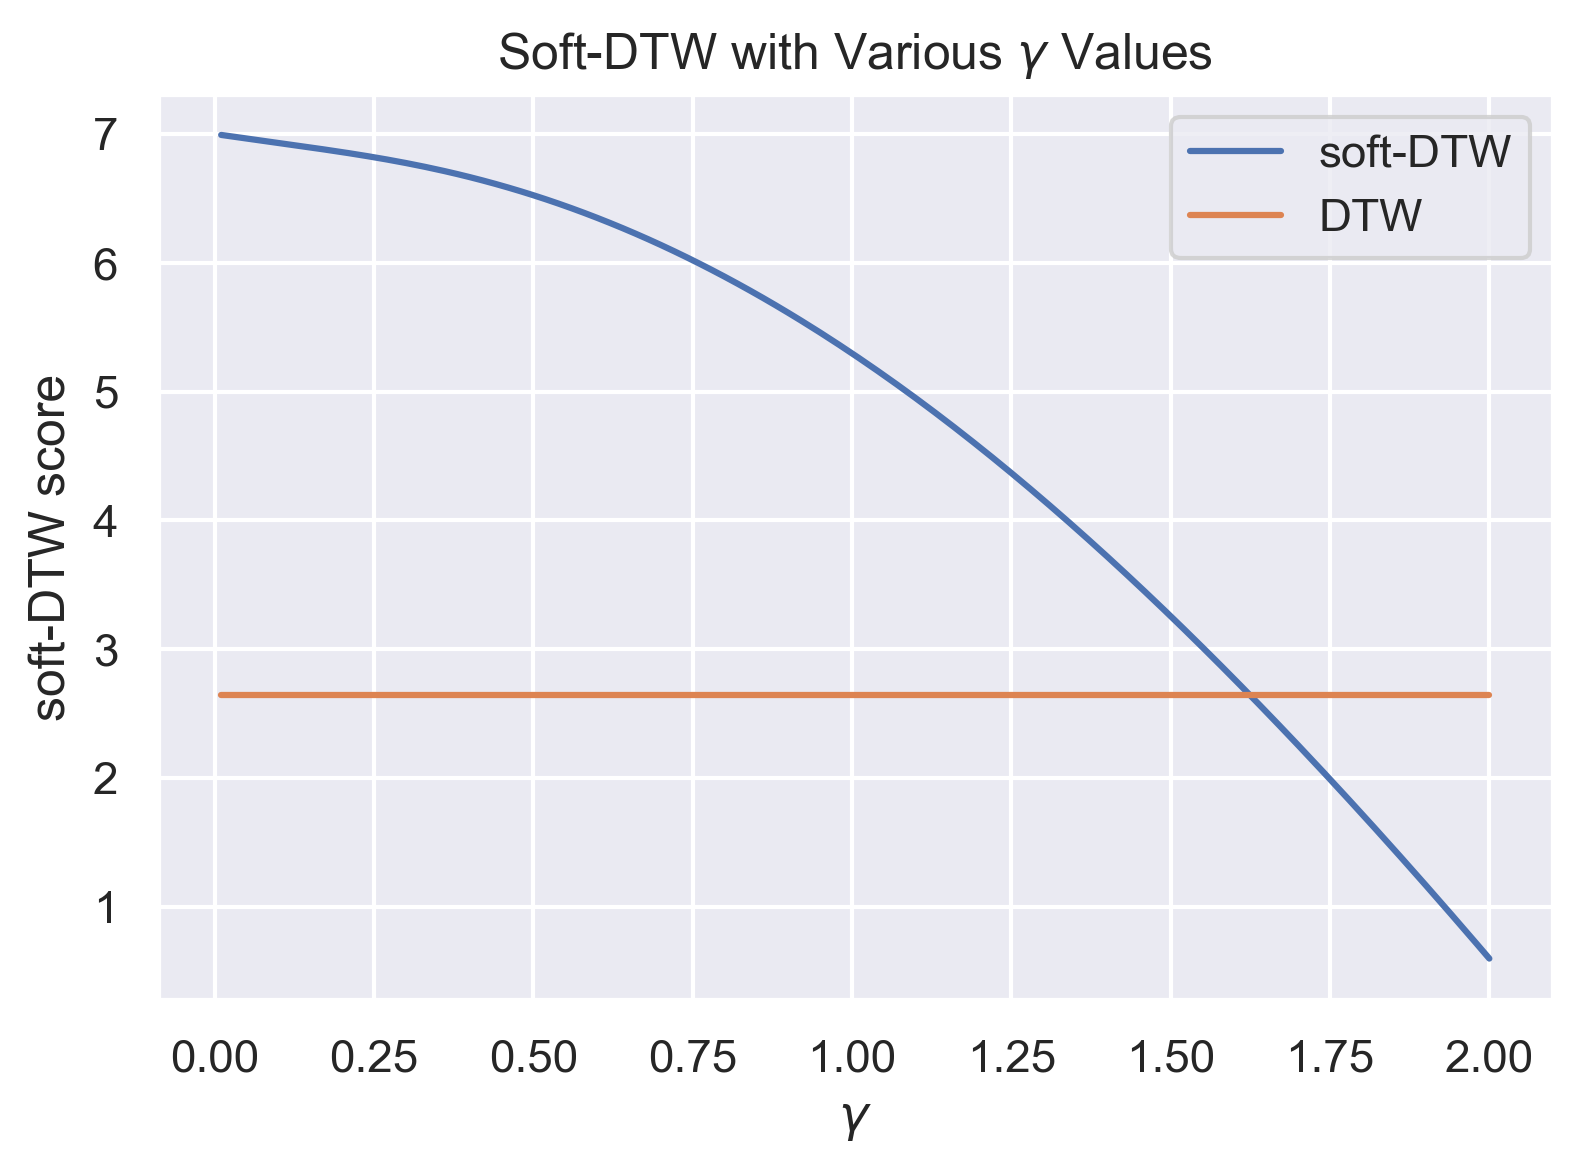

In [134]:
gammas = np.arange(0.01, 2.01, 0.01)
dtw_score = dtw(x, y)
soft_dtw_scores = np.array([soft_dtw(x, y, gamma=g) for g in gammas])

fig, ax = plt.subplots(dpi=300)
sns.lineplot(gammas, soft_dtw_scores, ax=ax, label="soft-DTW")
sns.lineplot(gammas, dtw_score, ax=ax, label="DTW")
ax.legend()
ax.set(
    title=r"Soft-DTW with Various $\gamma$ Values",
    xlabel=r"$\gamma$",
    ylabel="soft-DTW score"
);

In [82]:
from tslearn.barycenters import softdtw_barycenter
# b = softdtw_barycenter(dataset, gamma=0.1)